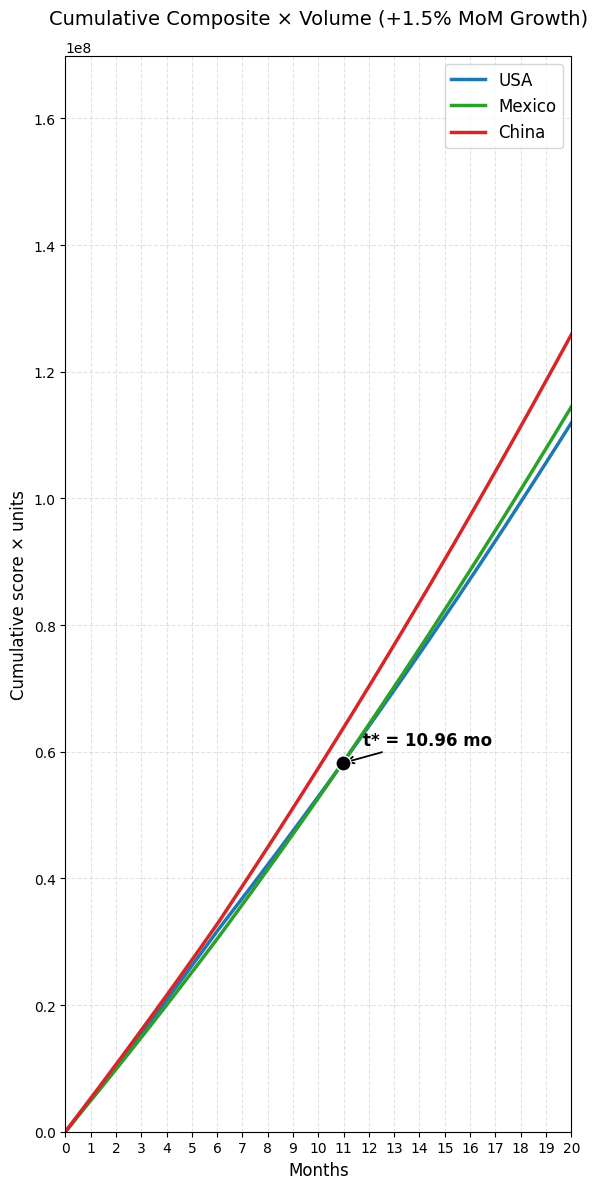

交点（USA 累计首次低于 Mexico） t* = 10.959 个月


In [13]:
# -*- coding: utf-8 -*-
# 绘制 China / USA / Mexico 三国累计曲线
# 仅标出“USA 累计首次低于 Mexico”的交点（不标原点、不写单位）

import numpy as np
import matplotlib.pyplot as plt

V0 = 145275
g  = 0.015
T_MAX = 20
dt = 0.005

scores_0_6 = {"China":36.1956, "USA":35.0079, "Mexico":33.6246}
scores_6p  = {"China":37.9246, "USA":32.6839, "Mexico":34.2266}

def monthly_volume(m):
    return V0 * ((1.0 + g) ** (m - 1))

def monthly_score(country, m):
    return scores_0_6[country] if m <= 6 else scores_6p[country]

def cumulative_country(country, t_month):
    if t_month <= 0: return 0.0
    m_full = int(np.floor(t_month))
    frac   = t_month - m_full
    total = 0.0
    for m in range(1, m_full + 1):
        total += monthly_volume(m) * monthly_score(country, m)
    if frac > 0:
        m_next = m_full + 1
        total += frac * monthly_volume(m_next) * monthly_score(country, m_next)
    return total

def crossing_time_us_vs_mx(T_end=T_MAX, step=dt):
    ts = np.arange(0.0, T_end + step, step)
    prev_diff = None
    for t in ts:
        diff = cumulative_country("USA", t) - cumulative_country("Mexico", t)
        if prev_diff is not None and diff <= 0 < prev_diff:
            t0 = t - step
            alpha = prev_diff / (prev_diff - diff)
            return t0 + alpha * step
        prev_diff = diff
    return None

t_star = crossing_time_us_vs_mx()

# ---------- 绘图 ----------
ts = np.linspace(0, T_MAX, 1000)
cum_US = [cumulative_country("USA", t) for t in ts]
cum_MX = [cumulative_country("Mexico", t) for t in ts]
cum_CN = [cumulative_country("China", t) for t in ts]

plt.figure(figsize=(6, 12))
plt.plot(ts, cum_US, label="USA", linewidth=2.5, color="#1f77b4")
plt.plot(ts, cum_MX, label="Mexico", linewidth=2.5, color="#2ca02c")
plt.plot(ts, cum_CN, label="China", linewidth=2.5, color="#d62728")

if t_star is not None:
    y_star = cumulative_country("USA", t_star)
    plt.scatter([t_star],[y_star], s=120, color="black", edgecolor="white", zorder=6)
    plt.annotate(f"t* = {t_star:.2f} mo",
                 xy=(t_star, y_star),
                 xytext=(t_star+0.8, y_star*1.05),
                 fontsize=12, fontweight="bold",
                 arrowprops=dict(arrowstyle="->", lw=1.3, color="black"))

plt.title("Cumulative Composite × Volume (+1.5% MoM Growth)", fontsize=14, pad=12)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Cumulative score × units", fontsize=12)

plt.xlim(0, T_MAX)
plt.xticks(range(0, T_MAX+1, 1))

y_max = max(max(cum_US), max(cum_MX), max(cum_CN))
plt.ylim(0, y_max * 1.35)

plt.grid(True, linestyle="--", alpha=0.35)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

if t_star:
    print(f"交点（USA 累计首次低于 Mexico） t* = {t_star:.3f} 个月")
else:
    print("在前 20 个月内，USA 累计未低于 Mexico。")